In [82]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from scipy import stats, optimize, interpolate

from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
set_config(display='diagram')
warnings.filterwarnings('ignore')
import klib

# Análise dos dados


In [88]:
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')
test.head(3)



,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0


In [46]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls', 'Values'])

for i, var in enumerate(train.columns):
    variables.loc[i] = [var, train[var].nunique(), train[var].isnull().sum(), train[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_excel('Data Dictionary.xls', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Number of nulls,Values,Unnamed: 1,Unnamed: 2
Variable,,,,,
Unnamed: 0,150000,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN
SeriousDlqin2yrs,2,0,"[1, 0]",Person experienced 90 days past due delinquenc...,Y/N
RevolvingUtilizationOfUnsecuredLines,125728,0,"[0.766126609, 0.957151019, 0.65818014, 0.23380...",Total balance on credit cards and personal lin...,percentage
age,86,0,"[45, 40, 38, 30, 49, 74, 57, 39, 27, 51, 46, 7...",Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,16,0,"[2, 0, 1, 3, 4, 5, 7, 10, 6, 98, 12, 8, 9, 96,...",Number of times borrower has been 30-59 days p...,integer
DebtRatio,114194,0,"[0.802982129, 0.121876201, 0.085113375, 0.0360...","Monthly debt payments, alimony,living costs di...",percentage
MonthlyIncome,13594,29731,"[9120.0, 2600.0, 3042.0, 3300.0, 63588.0, 3500...",Monthly income,real
NumberOfOpenCreditLinesAndLoans,58,0,"[13, 4, 2, 5, 7, 3, 8, 9, 6, 10, 14, 22, 17, 1...",Number of Open loans (installment like car loa...,integer
NumberOfTimes90DaysLate,19,0,"[0, 1, 3, 2, 5, 4, 98, 10, 9, 6, 7, 8, 15, 96,...",Number of times borrower has been 90 days or m...,integer


In [47]:
# Understand the variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls', 'Values'])

for i, var in enumerate(test.columns):
    variables.loc[i] = [var, test[var].nunique(), test[var].isnull().sum(), test[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_excel('Data Dictionary.xls', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Number of nulls,Values,Unnamed: 1,Unnamed: 2
Variable,,,,,
Unnamed: 0,101503,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN
SeriousDlqin2yrs,0,101503,[nan],Person experienced 90 days past due delinquenc...,Y/N
RevolvingUtilizationOfUnsecuredLines,85716,0,"[0.88551908, 0.463295269, 0.043275036, 0.28030...",Total balance on credit cards and personal lin...,percentage
age,82,0,"[43, 57, 59, 38, 27, 63, 50, 79, 68, 23, 37, 5...",Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,16,0,"[0, 1, 98, 2, 4, 3, 8, 5, 6, 7, 9, 10, 96, 12,...",Number of times borrower has been 30-59 days p...,integer
DebtRatio,79878,0,"[0.177512717, 0.527236928, 0.687647522, 0.9259...","Monthly debt payments, alimony,living costs di...",percentage
MonthlyIncome,11976,20103,"[5700.0, 9141.0, 5083.0, 3200.0, 3865.0, 4140....",Monthly income,real
NumberOfOpenCreditLinesAndLoans,56,0,"[4, 15, 12, 7, 5, 8, 0, 6, 16, 14, 10, 13, 17,...",Number of Open loans (installment like car loa...,integer
NumberOfTimes90DaysLate,18,0,"[0, 98, 1, 2, 3, 5, 4, 8, 6, 9, 7, 96, 17, 10,...",Number of times borrower has been 90 days or m...,integer


In [49]:
train[["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]].describe()

,RevolvingUtilizationOfUnsecuredLines,DebtRatio
count,150000.000000,150000.000000
mean,6.048438,353.005076
std,249.755371,2037.818523
min,0.000000,0.000000
25%,0.029867,0.175074
50%,0.154181,0.366508
75%,0.559046,0.868254
max,50708.000000,329664.000000


In [50]:
train[["MonthlyIncome"]].describe()

,MonthlyIncome
count,1.202690e+05
mean,6.670221e+03
std,1.438467e+04
min,0.000000e+00
25%,3.400000e+03
50%,5.400000e+03
75%,8.249000e+03
max,3.008750e+06


In [51]:
train[ ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]].describe()

,NumberOfDependents,NumberOfTime60-89DaysPastDueNotWorse,NumberRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,age
count,146076.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.757222,0.240387,1.018240,0.265973,8.452760,0.421033,52.295207
std,1.115086,4.155179,1.129771,4.169304,5.145951,4.192781,14.771866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,41.000000
50%,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,52.000000
75%,1.000000,0.000000,2.000000,0.000000,11.000000,0.000000,63.000000
max,20.000000,98.000000,54.000000,98.000000,58.000000,98.000000,109.000000


In [56]:
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]

REAL= ["MonthlyIncome"]
 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]

TARGET = ["SeriousDlqin2yrs"]

GridSpec(6, 6)

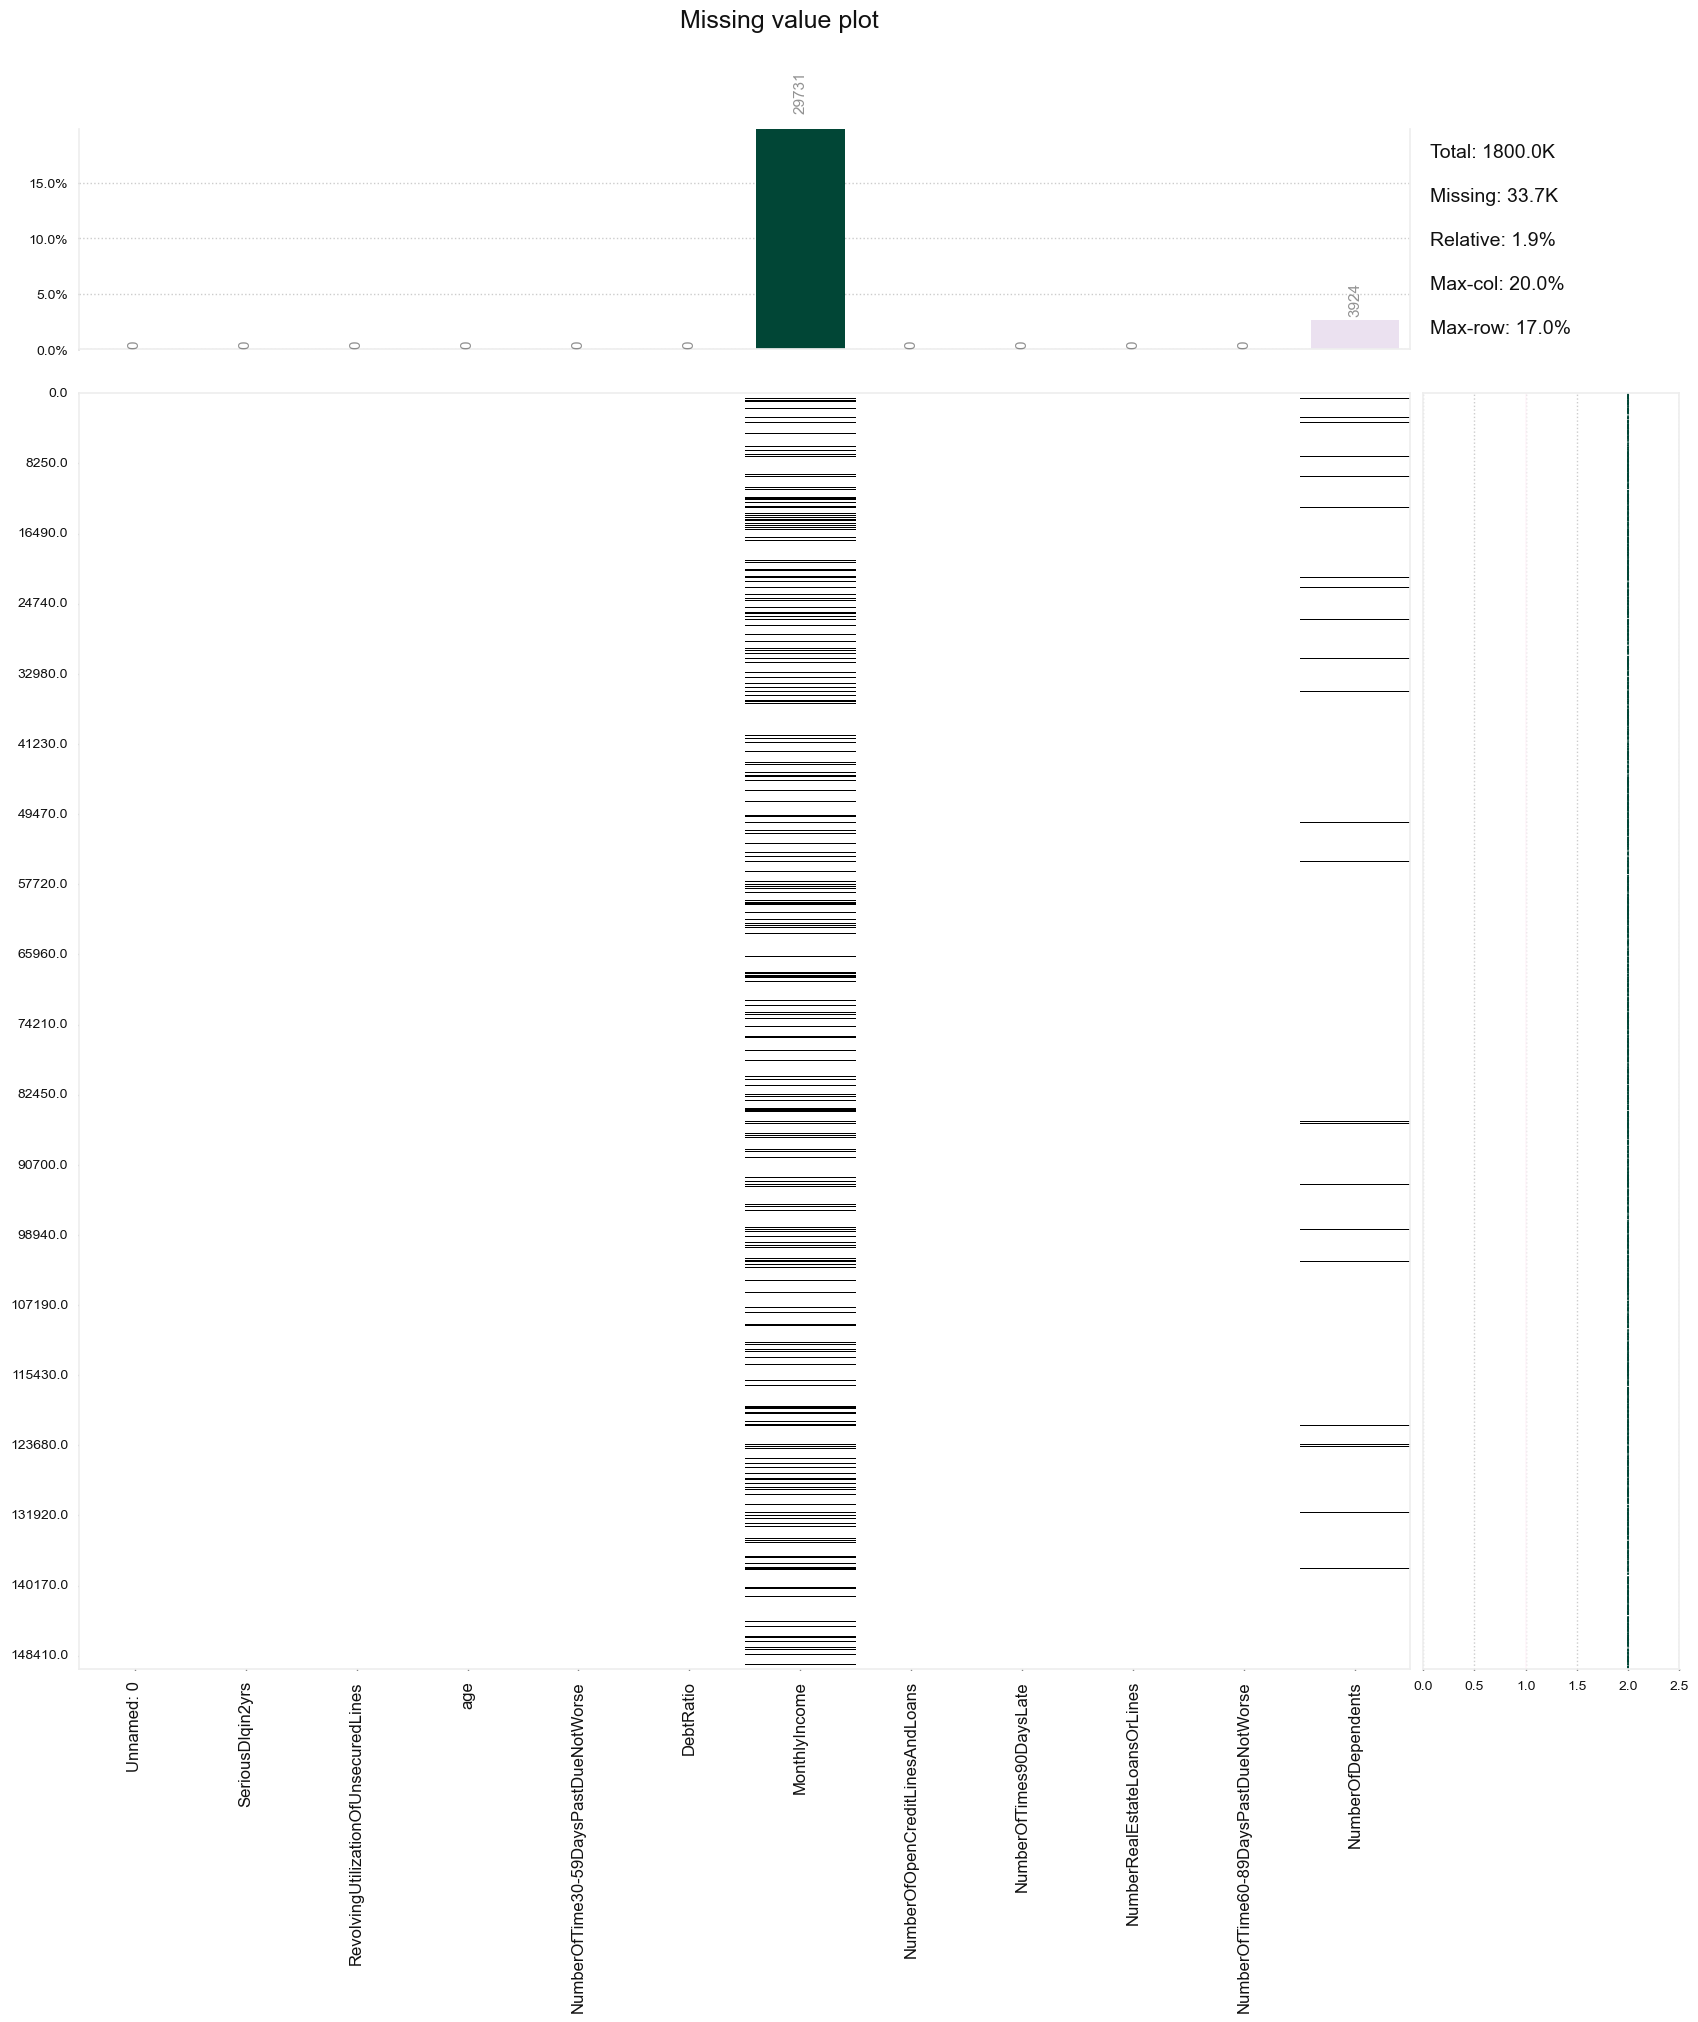

In [57]:
klib.missingval_plot(train)

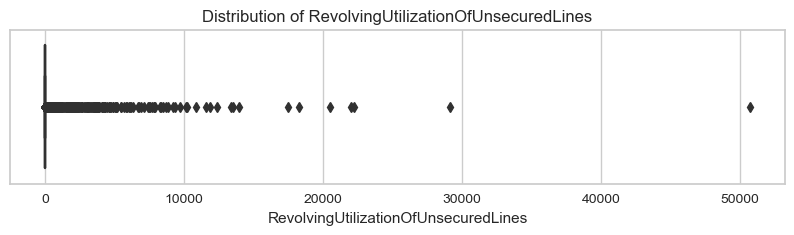

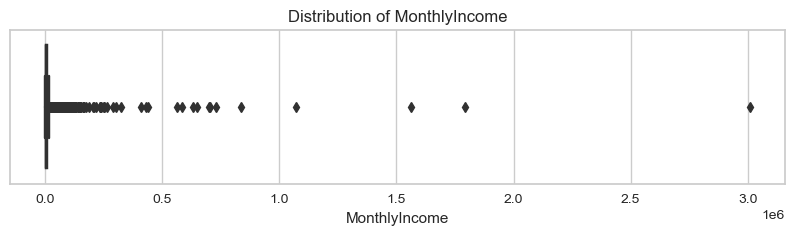

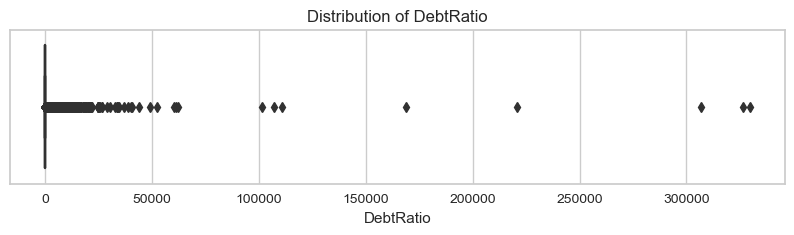

In [65]:
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='RevolvingUtilizationOfUnsecuredLines')
plt.title("Distribution of RevolvingUtilizationOfUnsecuredLines");
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='MonthlyIncome')
plt.title("Distribution of MonthlyIncome");
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='DebtRatio')
plt.title("Distribution of DebtRatio");

# Modelos de machine learning


In [67]:
y = train['SeriousDlqin2yrs']


In [71]:
#criaçao do dicionario param

param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
           # 'gpu_id':0, 
           # 'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
            # 'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

In [74]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

In [75]:
###############################################################################
#                        Final X and Y                                    #
###############################################################################

# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [76]:
del train
del test 
del train_final
del test_final

In [77]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

In [78]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

In [80]:
#                       Fe Class                                              #
###############################################################################

class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

In [83]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

In [84]:
params_hgbc = {'l2_regularization': 2.940296779699346e-10, 
         'early_stopping': 'False',
         'learning_rate': 0.015318591316397998, 
         'max_iter': 1537, 
         'max_depth': 19, 
         'max_bins': 137, 
         'min_samples_leaf': 140,
         'max_leaf_nodes': 23}
model_hgbc = HistGradientBoostingClassifier(**params_hgbc)


O primeiro modelo usado

In [89]:
pipe1_model_hgbc_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        #('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
        #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_hgbc)
    ]
)